<a href="https://colab.research.google.com/github/isabela1s/esruturas/blob/main/AULA14_LINHA_ELASTICA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# instalação do anastruct
!pip install anastruct

# importando os pacotes
import numpy as np
import matplotlib.pyplot as plt

from anastruct import SystemElements

**Exemplo:** Considere o problema abaixo com os seguintes dados:

*   Carga concentrada $P = 1$ kN;
*   Seção transversal com dimensões $b=20$ cm e $h=40$ cm;
*   Comprimento $L=10$ m.
*   Módulo de elasticidade $E=210$ GPa (aço).

Utilizando o Anastruct, represente a viga abaixo através de 10 elementos e plote a deflexão em cada ponto. Qual a deflexão máxima encontrada? *Resposta: -0.0930 mm.*

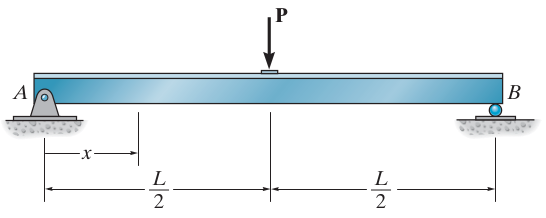

In [ ]:
"""
Conforme visto em sala, a deformação depende do módulo de elasticidade E e do
momento de inércia I. O Anastruct utiliza valores padrão se nenhum dado for
informado, mas também podemos inserir o valor do produto EI.

1ª opção: Na criação do sistema
ss = SystemElements(EI = E*I)

2ª opção: Na definição dos elementos
ss.add_element(location=[0, 0], [0, 1]], EI = E*I)

Use a 2ª opção em caso de variação de material e/ou formato da seção transversal.
"""

# Definição das dimensões e propriedades da viga:

# Criação do sistema:
ss = SystemElements(EI = E*I)

"""
Dica: Crie um vetor posição para cada um dos 11 nós e adicione os elementos em
um loop, assim podemos testar uma "malha" mais ou menos refinada.
"""

# Declaração dos apoios:

# Adição do carregamento:

# Solução:
ss.solve()

# Acesso as informações de deformação (NOVA FERRAMENTA):
displacements = ss.get_node_displacements()
"""
Obtém a lista de deslocamentos e rotações nos nós da estrutura
Cada elemento da lista é um dicionário (d) com chaves:
'id'   : número do nó,
'ux'   : deslocamento horizontal (neste caso, zero),
'uy'   : deslocamento vertical,
'phi_z': ângulo de deflexão (em radianos)
"""
v = np.array([d['uy'] for d in displacements])
theta = np.degrees([d['phi_z'] for d in displacements]) # transformando a rotação em graus

# Imprima a posição de cada nó, v(x) e theta(x):

# Deflexão máxima:
print(f"\nDeflexão máxima: {min(v):.6e} m") # min porque os valores são negativos

# Plotar deflexão padrão anastruct (fica tudo zerado):
ss.show_displacement()

# Plotar manualmente:
plt.figure(figsize=(10, 5))
plt.plot(x, v*1000, 'b-') # viga deformada
plt.xlabel('x (m)')
plt.ylabel(f'v(x) (mm)')
plt.grid(True)
plt.show()

In [ ]:
# Solução usando teoria

import sympy as sp

# Definição de símbolos e parâmetros
x, L, P, E, I = sp.symbols('x L P E I', positive=True, real=True)
V_A, V_B = sp.symbols('V_A V_B', real=True)

# Equilíbrio das reações
eqs_reac = [
    # Soma Fy
    # Soma M_A
]
reactions = sp.solve(eqs_reac, (V_A, V_B))
print("Reações de apoio:\n")
display(reactions)

# Equação do momento fletor
M1 = # 0 <= x <= L/2
M2 = # L/2 <= x <= L
print(f"\nEquações de momento fletor:\n")
print(f"M1= {M1}")
print(f"M2= {M2}")

# Definição das EDOs e soluções gerais
v1 = sp.Function('v1')(x)
v2 = sp.Function('v2')(x)

ode1 = sp.Eq(E*I * v1.diff(x,2), M1)
ode2 = sp.Eq(E*I * v2.diff(x,2), M2)

sol1 = sp.dsolve(ode1, v1)
sol2 = sp.dsolve(ode2, v2)

"""
O dsolve utiliza constantes de integração genéricas C1, C2 para cada EDO, então
precisamos renomear as constantes da sol. 2 como C3 e C4 para evitar confusões.
"""

# Declarar todas as constantes de integração ---
C1, C2, C3, C4 = sp.symbols('C1 C2 C3 C4')

sol2_new = sp.Eq(v2, sol2.rhs.subs({'C1': C3, 'C2': C4}))

print("\nSoluções gerais (antes de aplicar C.C.):\n")
display(sol1, sol2_new)

# Extrair expressões (lado direito)
v1_expr = sol1.rhs
v2_expr = sol2_new.rhs

# Substituir as reações de apoio
v1_expr = v1_expr.subs(reactions)
v2_expr = v2_expr.subs(reactions)

# Calcular inclinações (derivadas) em cada trecho
theta1_expr = v1_expr.diff(x)
theta2_expr = v2_expr.diff(x)

# Montar condições de contorno e continuidade
bc_eqs = [
    v1_expr.subs(x, 0),          # v1(0) = 0
    # declarar + 3 condições
]

# Resolver constantes C1,C2,C3,C4
ctes = sp.solve(bc_eqs, (C1, C2, C3, C4))
print("\nConstantes de integração:\n")
display(ctes)

# Substituir de volta para obter as expressões finais
v1_final = sp.simplify(v1_expr.subs(ctes))
v2_final = sp.simplify(v2_expr.subs(ctes))

print("\nDeflexão final trecho A (0 ≤ x ≤ L/2):\n")
display(sp.Eq(v1, v1_final))

print("\nDeflexão final trecho B (L/2 ≤ x ≤ L):\n")
display(sp.Eq(v2, v2_final))

In [ ]:
# Substituir valores numéricos:

subs_vals = {
    L: ,
    P: ,
    E: ,
    I:
}

# Substituir valores numéricos
v1_num = sp.simplify(v1_final.subs(subs_vals))
v2_num = sp.simplify(v2_final.subs(subs_vals))

# Gerar pontos para plot
x1_vals = np.linspace(0, L_val/2, 200)
x2_vals = np.linspace(L_val/2, L_val, 200)

# Converter expressões simbólicas para funções numéricas
v1_func = sp.lambdify(x, v1_num, 'numpy')
v2_func = sp.lambdify(x, v2_num, 'numpy')

v1_vals = v1_func(x1_vals)
v2_vals = v2_func(x2_vals)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(x1_vals, -v1_vals * 1000)
plt.plot(x2_vals, -v2_vals * 1000)
plt.xlabel('x (m)')
plt.ylabel('v(x) (mm)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Deflexão máxima no centro
v_centro = v1_num.subs(x, L_val/2).evalf()
print(f"Deflexão máxima no centro (x = {L_val/2} m): {v_centro:.6e} m")

**Exercício 2:** Considere o problema abaixo com os seguintes dados:

*   Carga uniformemente distribuída $w = 1$ kN/m;
*   Seção transversal com dimensões $b=10$ cm e $h=30$ cm;
*   Comprimento $L=3$ m;
*   Trecho $a=1$ m;
*   Módulo de elasticidade $E=210$ GPa (aço).

Utilizando o anastruct, divida a viga em $12$ intervalos iguais e plote a deflexão em cada ponto. Qual  a deflexão máxima? Compare sua solução com a teoria (fazendo à mão ou numericamente como fizemos no exemplo). *Resposta: -0.0097 mm*

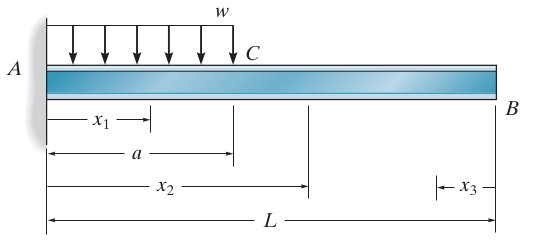

In [1]:
"""
Conforme visto em sala, a deformação depende do módulo de elasticidade E e do
momento de inércia I. O Anastruct utiliza valores padrão se nenhum dado for
informado, mas também podemos inserir o valor do produto EI.

1ª opção: Na criação do sistema
ss = SystemElements(EI = E*I)

2ª opção: Na definição dos elementos
ss.add_element(location=[0, 0], [0, 1]], EI = E*I)

Use a 2ª opção em caso de variação de material e/ou formato da seção transversal.
"""

# Definição das dimensões e propriedades da viga:

# Criação do sistema:
ss = SystemElements(EI = E*I)

"""
Dica: Crie um vetor posição para cada um dos 11 nós e adicione os elementos em
um loop, assim podemos testar uma "malha" mais ou menos refinada.
"""

# Declaração dos apoios:

# Adição do carregamento:

# Solução:
ss.solve()

# Acesso as informações de deformação (NOVA FERRAMENTA):
displacements = ss.get_node_displacements()
"""
Obtém a lista de deslocamentos e rotações nos nós da estrutura
Cada elemento da lista é um dicionário (d) com chaves:
'id'   : número do nó,
'ux'   : deslocamento horizontal (neste caso, zero),
'uy'   : deslocamento vertical,
'phi_z': ângulo de deflexão (em radianos)
"""
v = np.array([d['uy'] for d in displacements])
theta = np.degrees([d['phi_z'] for d in displacements]) # transformando a rotação em graus

# Imprima a posição de cada nó, v(x) e theta(x):

# Deflexão máxima:
print(f"\nDeflexão máxima: {min(v):.6e} m") # min porque os valores são negativos

# Plotar deflexão padrão anastruct (fica tudo zerado):
ss.show_displacement()

# Plotar manualmente:
plt.figure(figsize=(10, 5))
plt.plot(x, v*1000, 'b-') # viga deformada
plt.xlabel('x (m)')
plt.ylabel(f'v(x) (mm)')
plt.grid(True)
plt.show()

NameError: name 'SystemElements' is not defined

**Exercício 1:** Considere o problema abaixo com os seguintes dados:

*   Cargas concentradas $P = 5$ kN;
*   Seção transversal com dimensões $b=10$ cm e $h=30$ cm;
*   Comprimento $L=5$ m;
*   Trecho $a=1.5$ m;
*   Módulo de elasticidade $E=210$ GPa (aço).

Utilizando o anastruct, divida a viga em $10$ intervalos iguais e plote a deflexão em cada ponto. Qual  a deflexão máxima? Compare sua solução com a teoria (fazendo à mão ou numericamente como fizemos no exemplo). *Resposta: -0.4365 mm*.

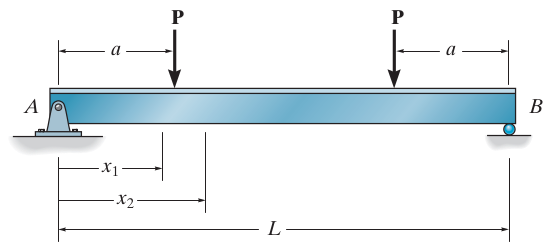

In [ ]:
"""
Uma boa opção para estudar também a parte teórica é fazer o desenvolvimento a
mão e já entrar com v1, v2 e v3. Assim usamos a parte numérica apenas para
encontrar as constantes de integração.
"""

# Símbolos
x, C1, C2, C3, C4, C5, C6 = sp.symbols('x C1 C2 C3 C4 C5 C6')

# Expressões das deflexões por trecho
v1 = # ... C1 e C2
v2 = # ... C3 e C4
v3 = # ... C5 e C6

# Inclinações
theta1 = sp.diff(v1, x)
theta2 = sp.diff(v2, x)
theta3 = sp.diff(v3, x)